In [119]:
import papermill as pm
import scrapbook as sb
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

In [120]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [121]:
[(last_dow(datetime(2021, 11, 5), 4) + timedelta(days=7 * x)) for x in range(1)]
for date in run_dates:
    print(date)

2021-11-29 00:00:00


In [122]:
ds = pd.read_sql('SELECT ts FROM ohlc', 'sqlite:///data/data.db')
a = pd.to_datetime(ds['ts'])
last_day = a.iloc[-1].to_pydatetime()
z = last_day.weekday()
start_day = last_day - timedelta(days=z+14)
start_day

datetime.datetime(2021, 11, 29, 0, 0)

In [123]:
tokens = pd.read_sql('SELECT token FROM ohlc', 'sqlite:///data/data.db')
tokens = np.array(tokens.token.unique())
tokens

array(['BTC', 'ETH', 'USDT', 'SOL', 'ADA', 'DOT', 'AVAX', 'ATOM', 'CRV',
       'AAVE', 'COMP'], dtype=object)

In [124]:
run_dates = [start_day]
connection_string = 'sqlite:///data/data.db'

In [125]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [126]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
        res = pm.execute_notebook(
            'hw4_analysis_template.ipynb',
            f'{base_output_folder}/{token}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'token': token,
                'connection_string': connection_string
            }
        )

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

In [127]:
for book, scrap in nbs.notebook_scraps.items():
    print(scrap['prices'].data['close'][-1]-scrap['prices'].data['close'][0])

-58.64500000000001
-0.24449999999999994
-2.7560000000000002
-22.929999999999993
-88.28
-1.0361999999999996
-6.0049999999999955
-141.71000000000004
-26.687000000000012
-9.999999999998899e-05
-6999.8399999999965


In [128]:
nbs = sb.read_notebooks('outputs')

In [129]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'volatility': scrap['prices'].data.volatility.mean(),
        'return': scrap['prices'].data['return'].mean(),
        'max_drawdown': abs(scrap['prices'].data['drawdown'].min()),
        'price_range': scrap['prices'].data['close'][-1]-scrap['prices'].data['close'][0]}) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,volatility,return,max_drawdown,price_range
0,AAVE,2021-11-29 00:00:00,2021-12-13 00:00:00,0.212356,-7.697463e-04,101.7870,-58.6450
1,ADA,2021-11-29 00:00:00,2021-12-13 00:00:00,0.217477,-4.241618e-04,0.5502,-0.2445
2,ATOM,2021-11-29 00:00:00,2021-12-13 00:00:00,0.299425,-1.776982e-04,10.9180,-2.7560
3,AVAX,2021-11-29 00:00:00,2021-12-13 00:00:00,0.286536,-5.540979e-04,49.0300,-22.9300
4,COMP,2021-11-29 00:00:00,2021-12-13 00:00:00,0.224354,-1.015116e-03,111.2000,-88.2800
5,CRV,2021-11-29 00:00:00,2021-12-13 00:00:00,0.328177,-5.385247e-04,2.1302,-1.0362
6,DOT,2021-11-29 00:00:00,2021-12-13 00:00:00,0.245633,-4.540131e-04,13.7040,-6.0050
7,ETH,2021-11-29 00:00:00,2021-12-13 00:00:00,0.174104,-6.065377e-05,897.7300,-141.7100
8,SOL,2021-11-29 00:00:00,2021-12-13 00:00:00,0.242432,-3.446384e-04,76.8030,-26.6870
9,USDT,2021-11-29 00:00:00,2021-12-13 00:00:00,0.011010,-2.517623e-07,0.0051,-0.0001


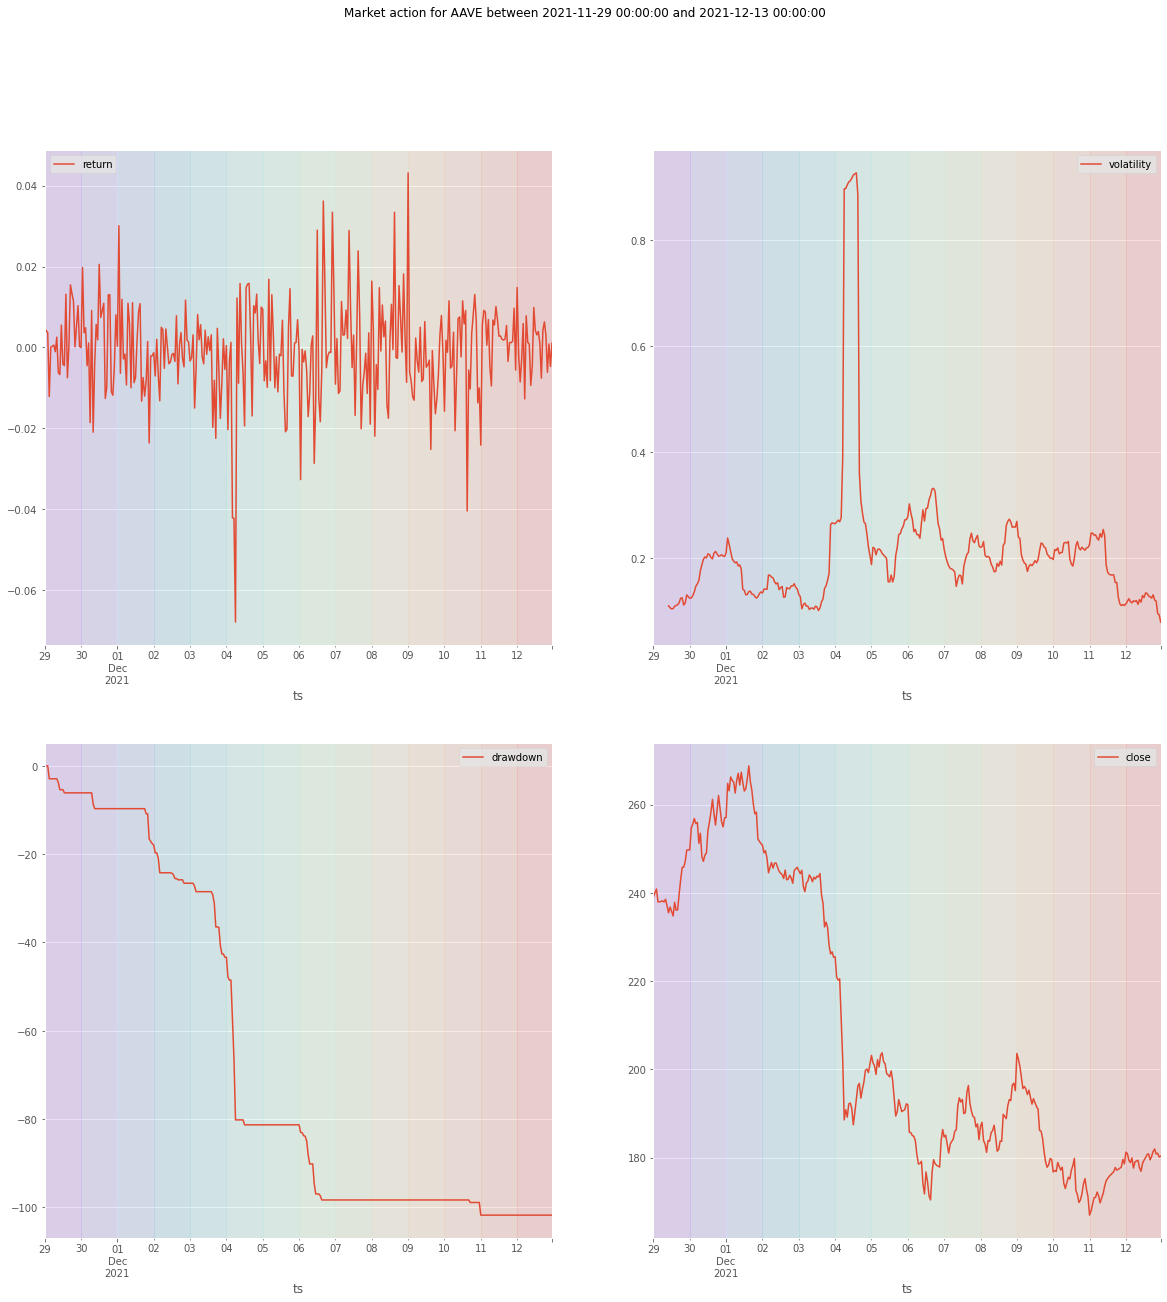

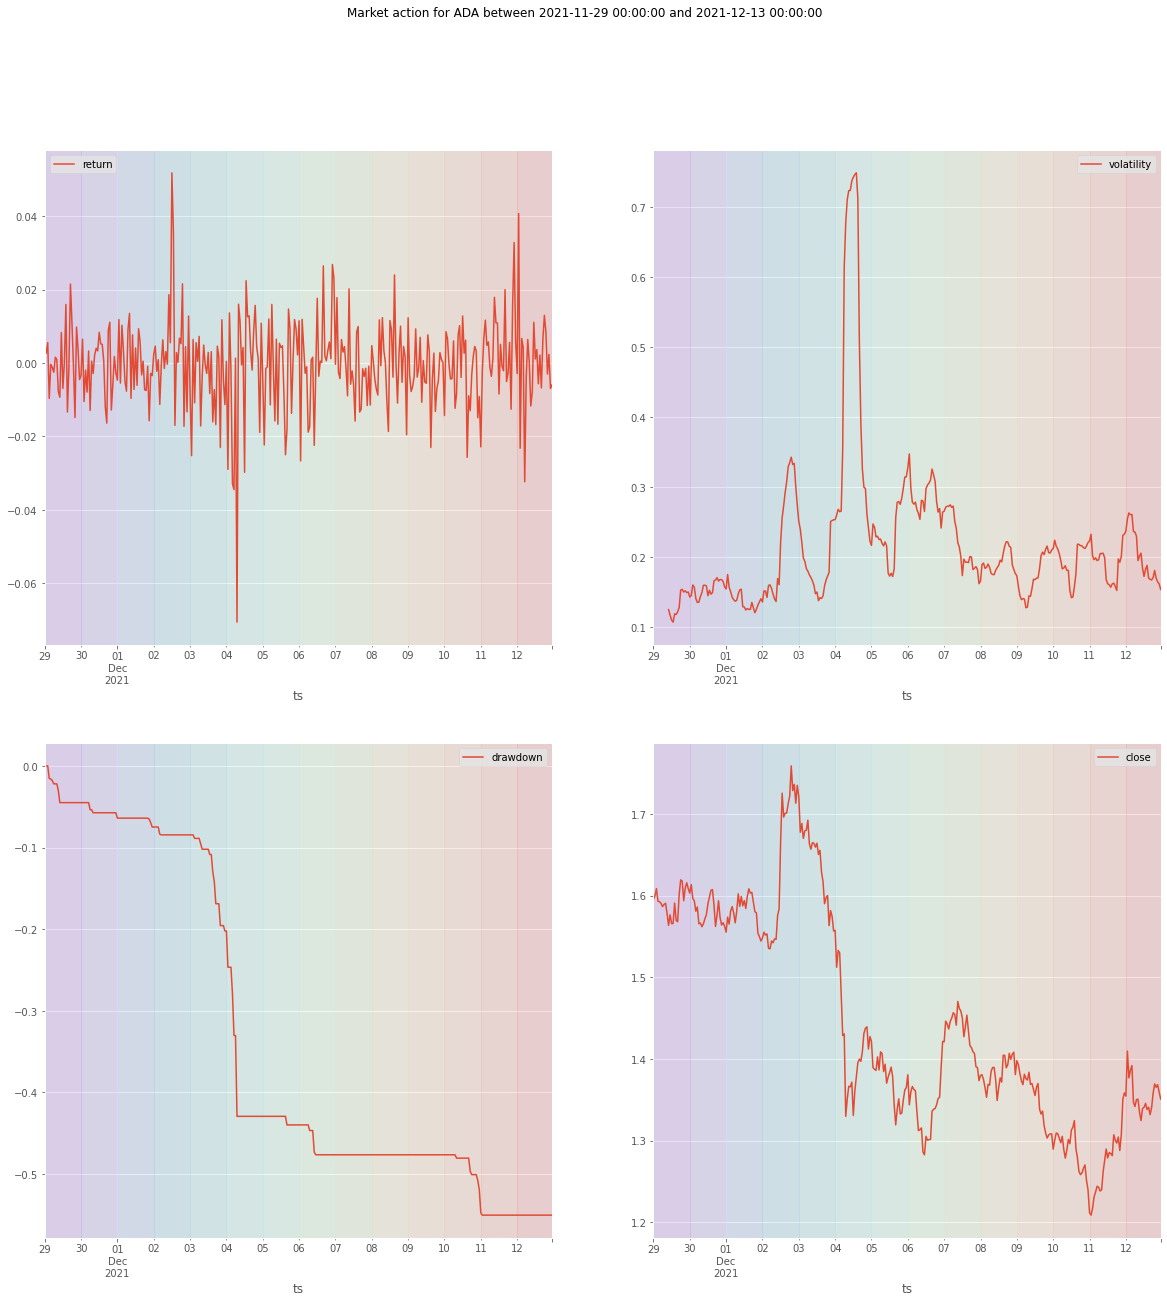

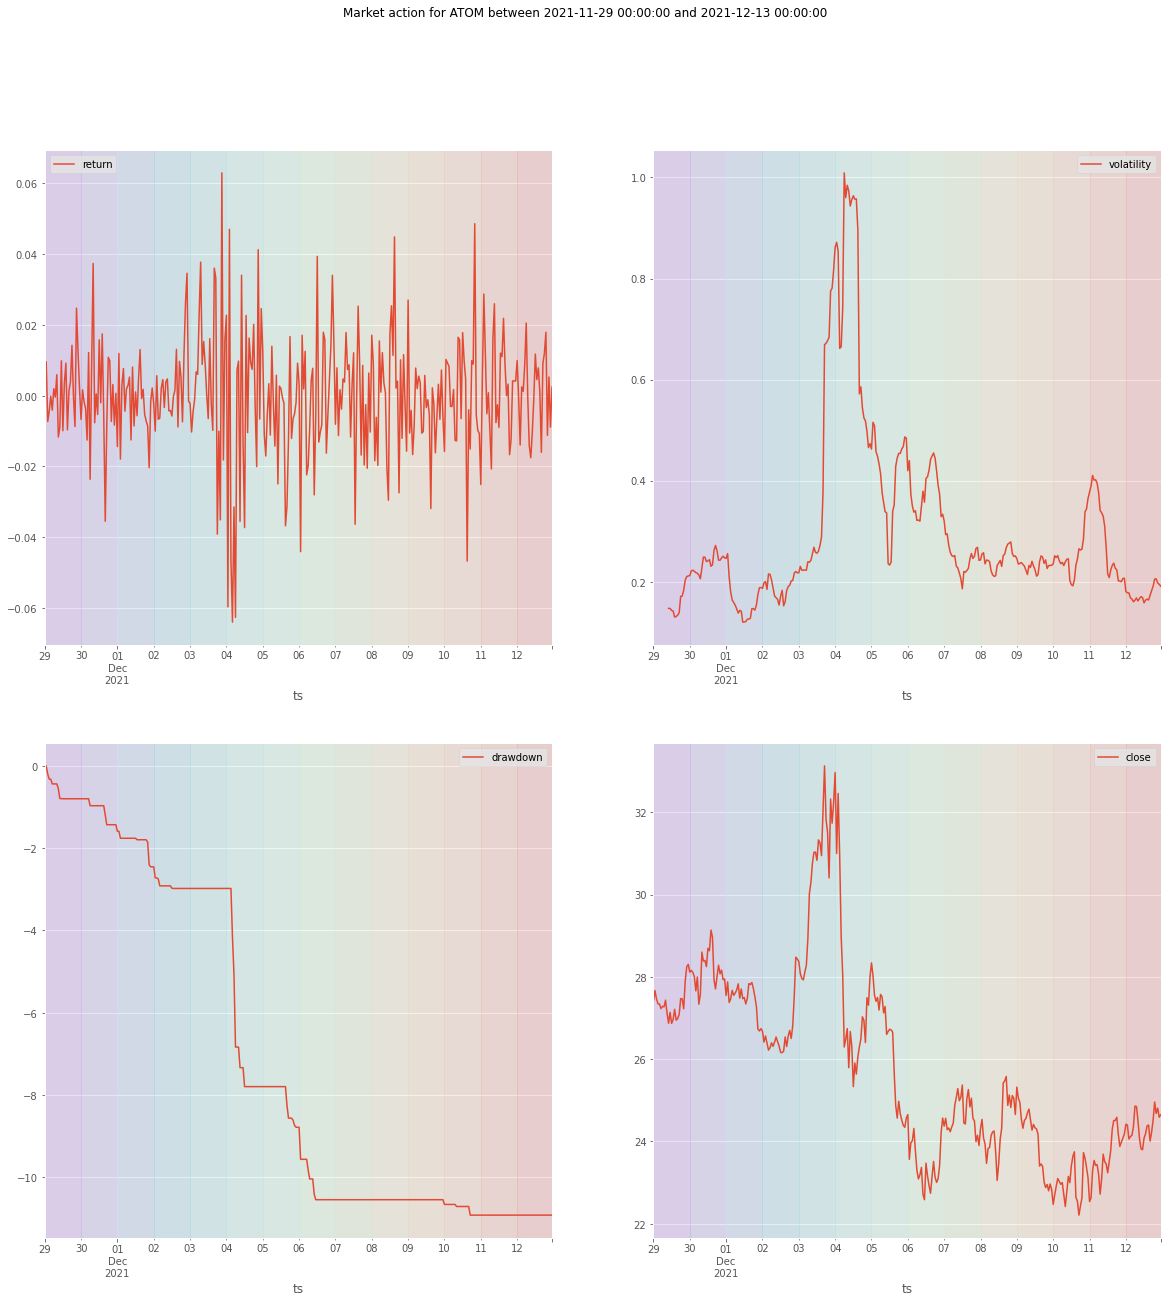

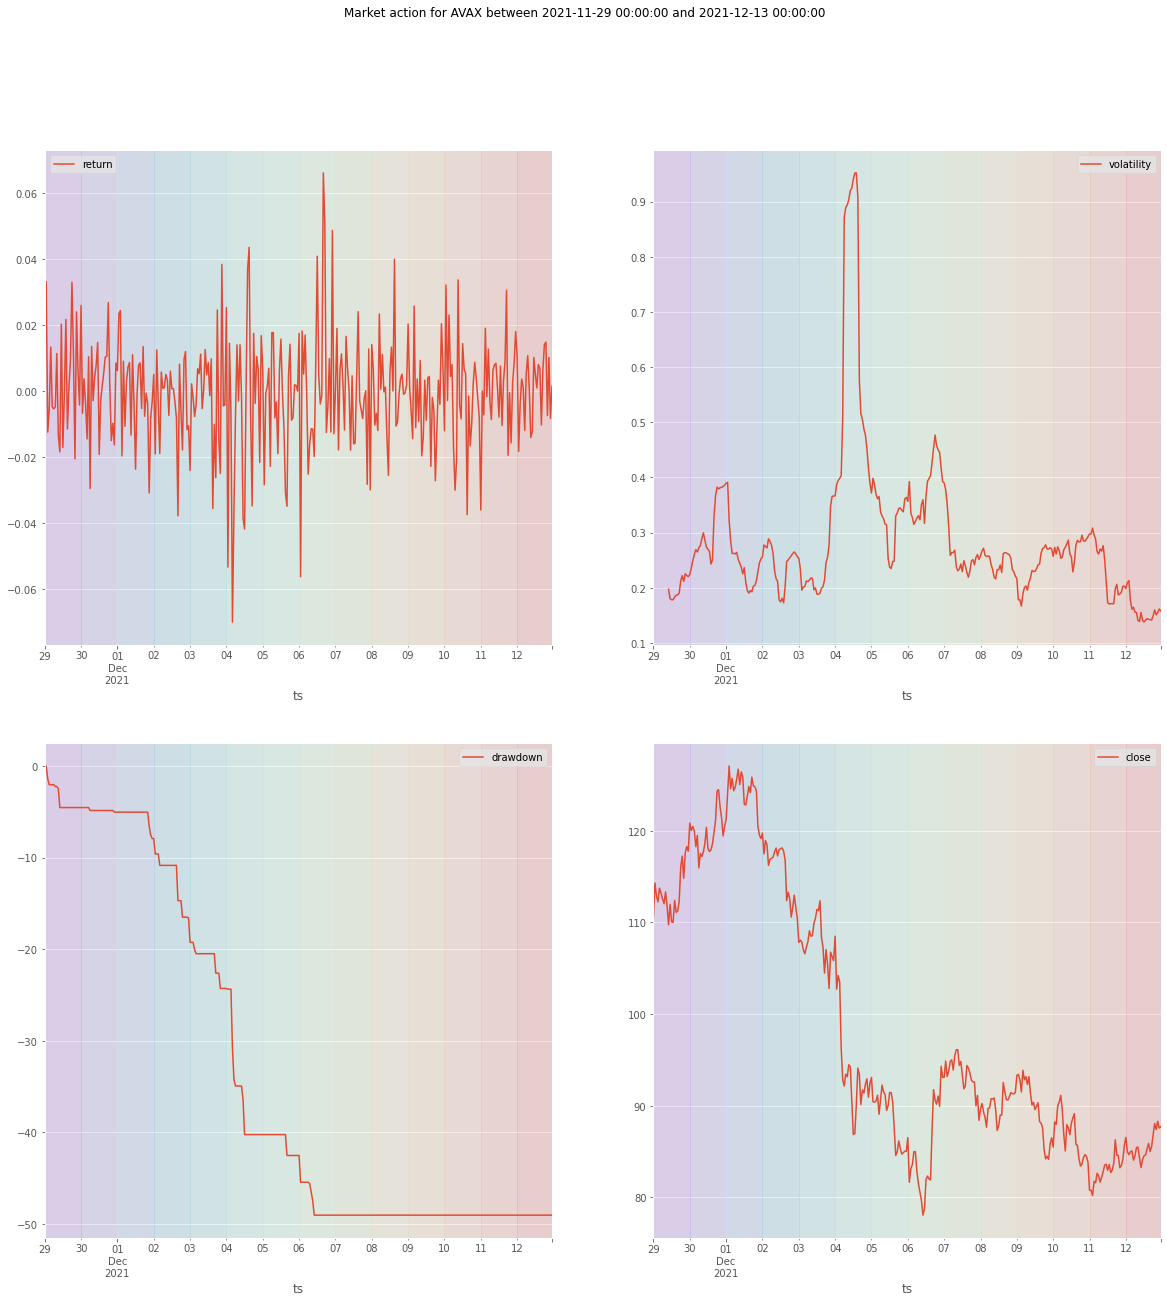

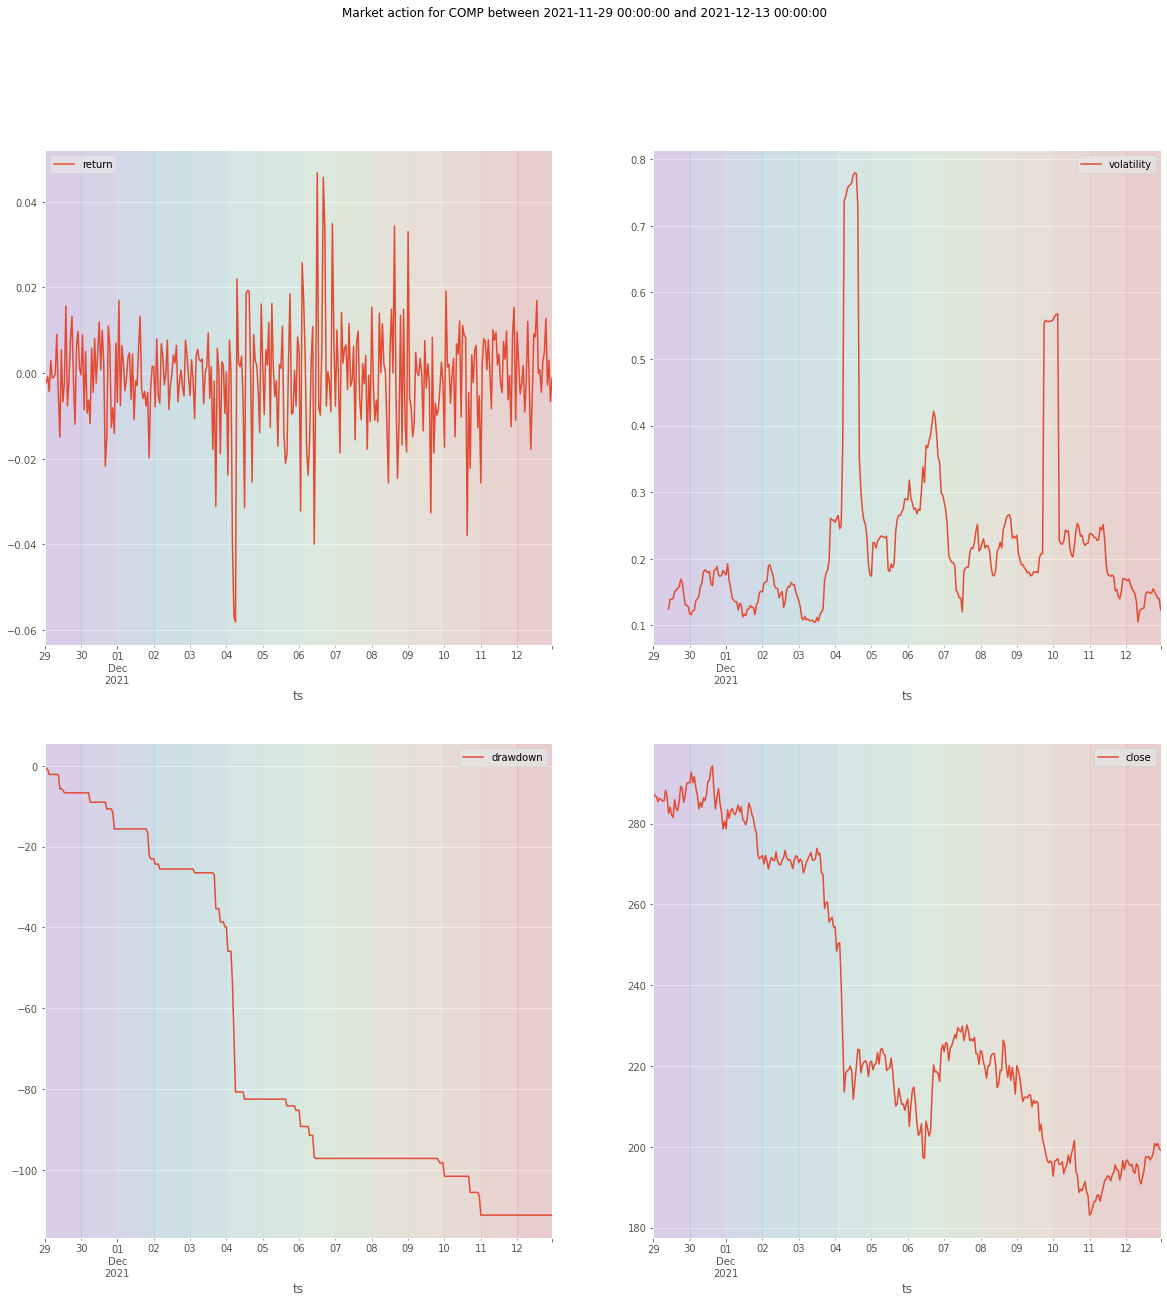

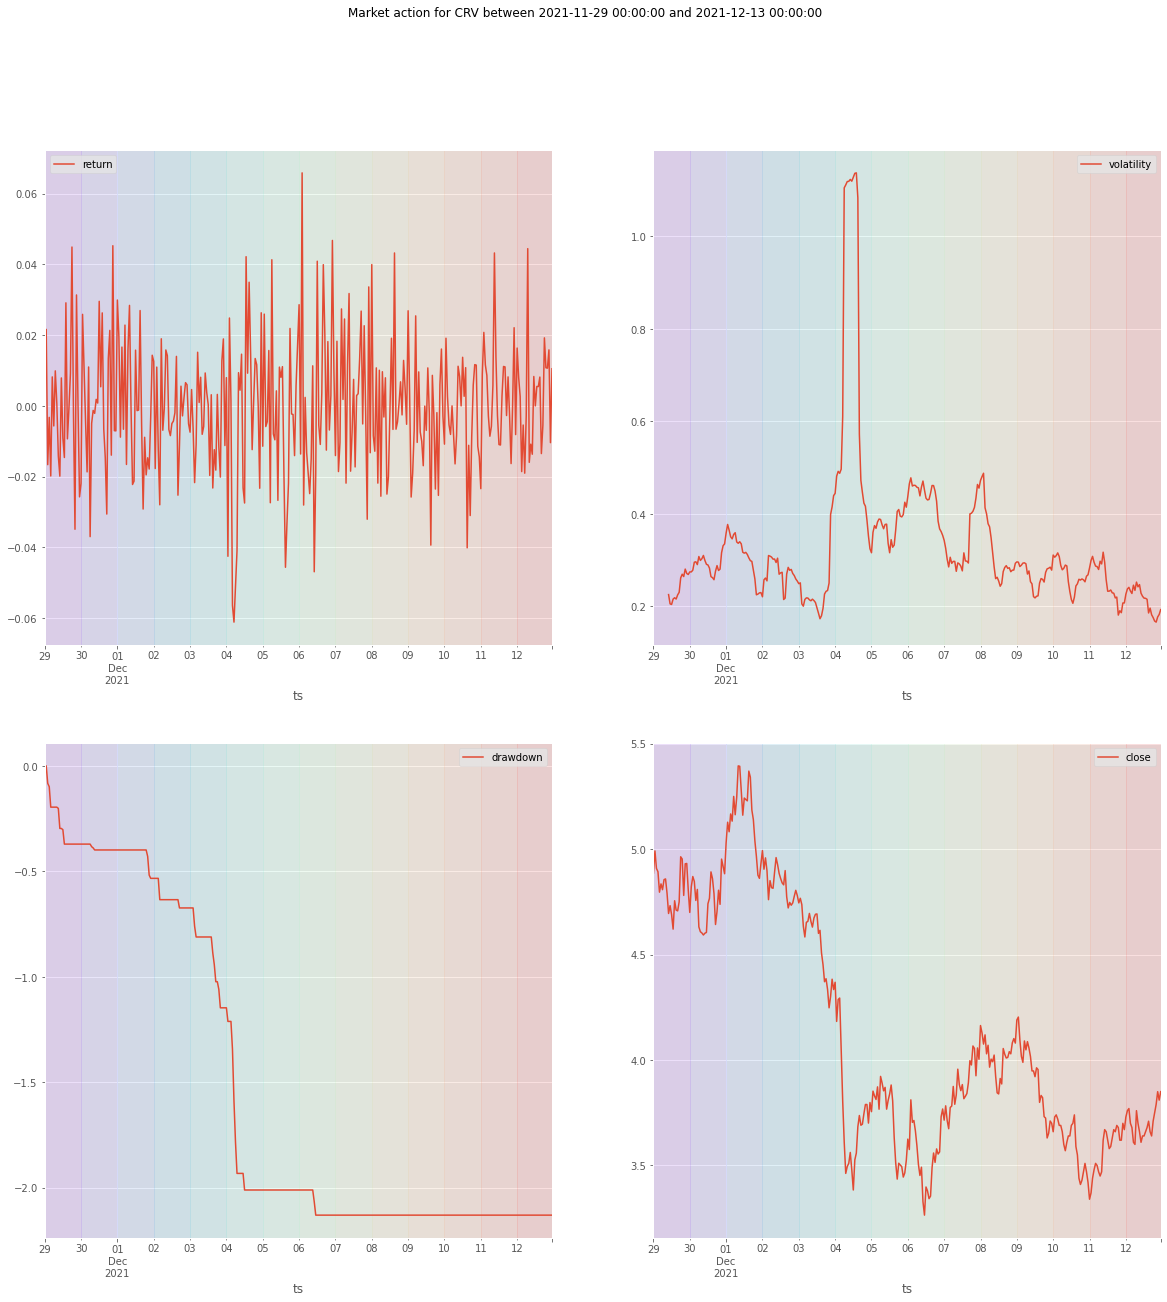

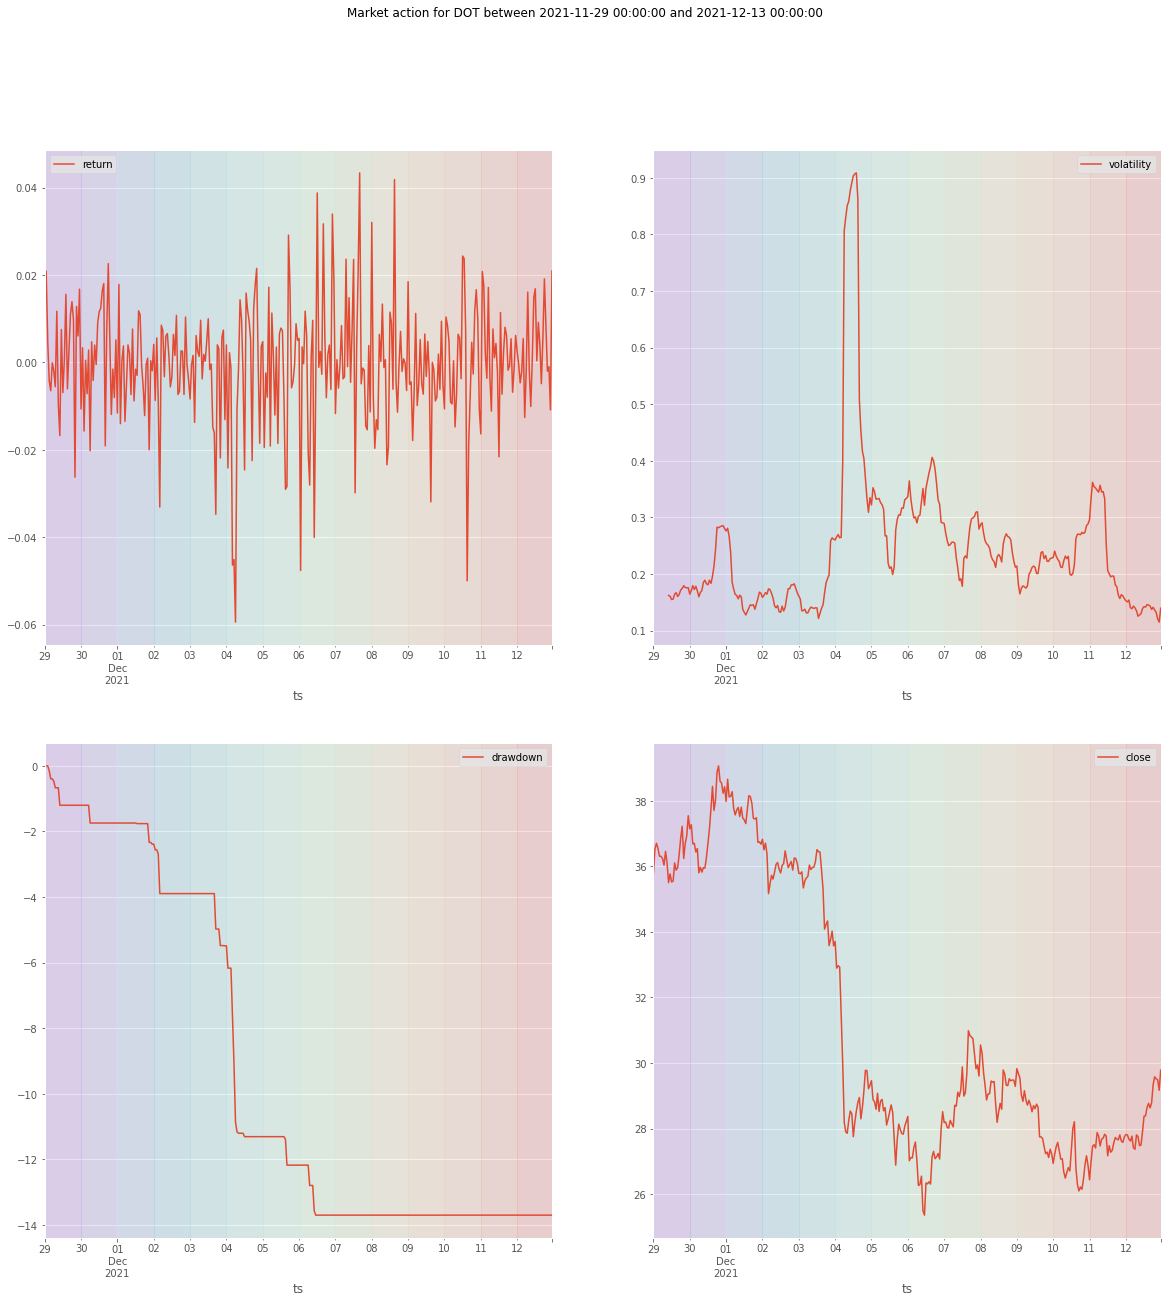

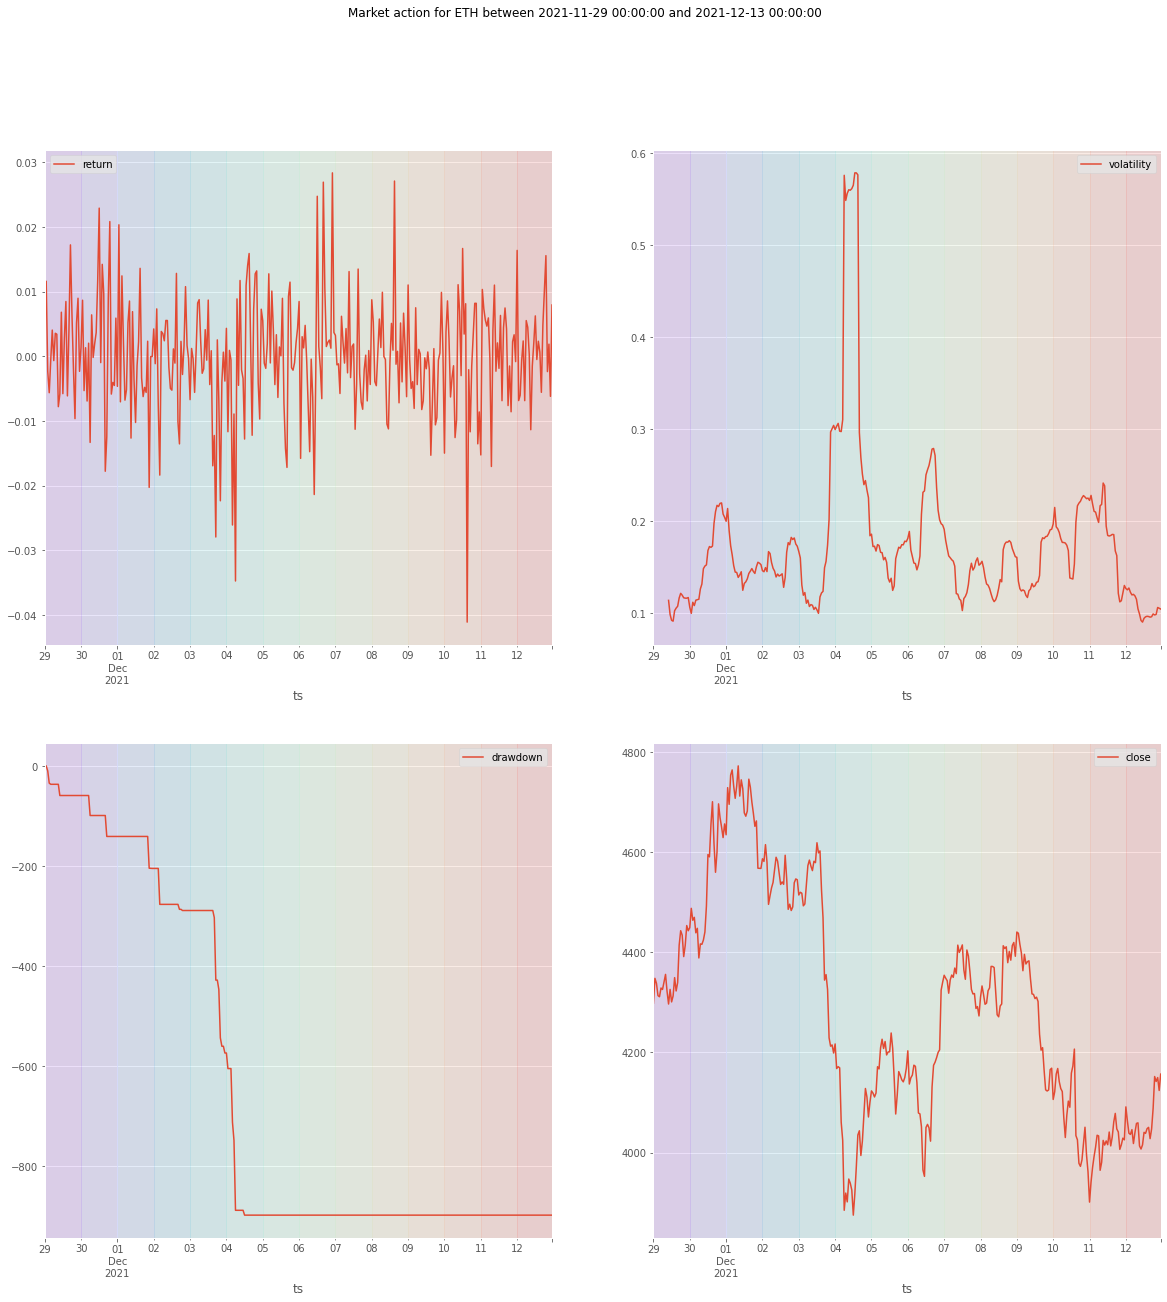

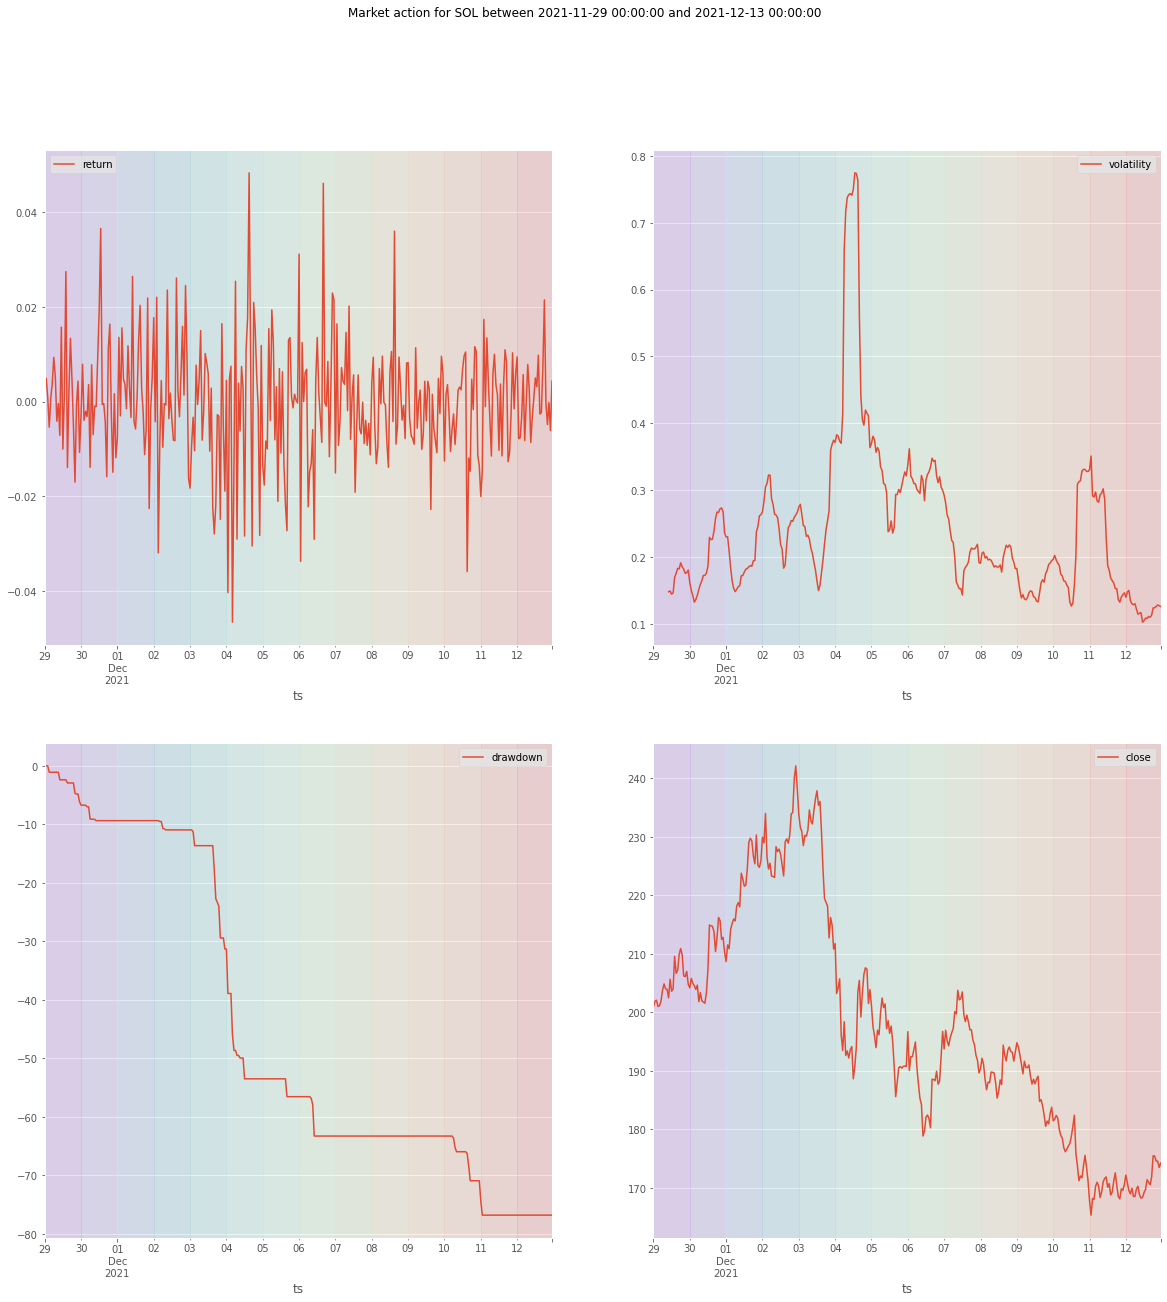

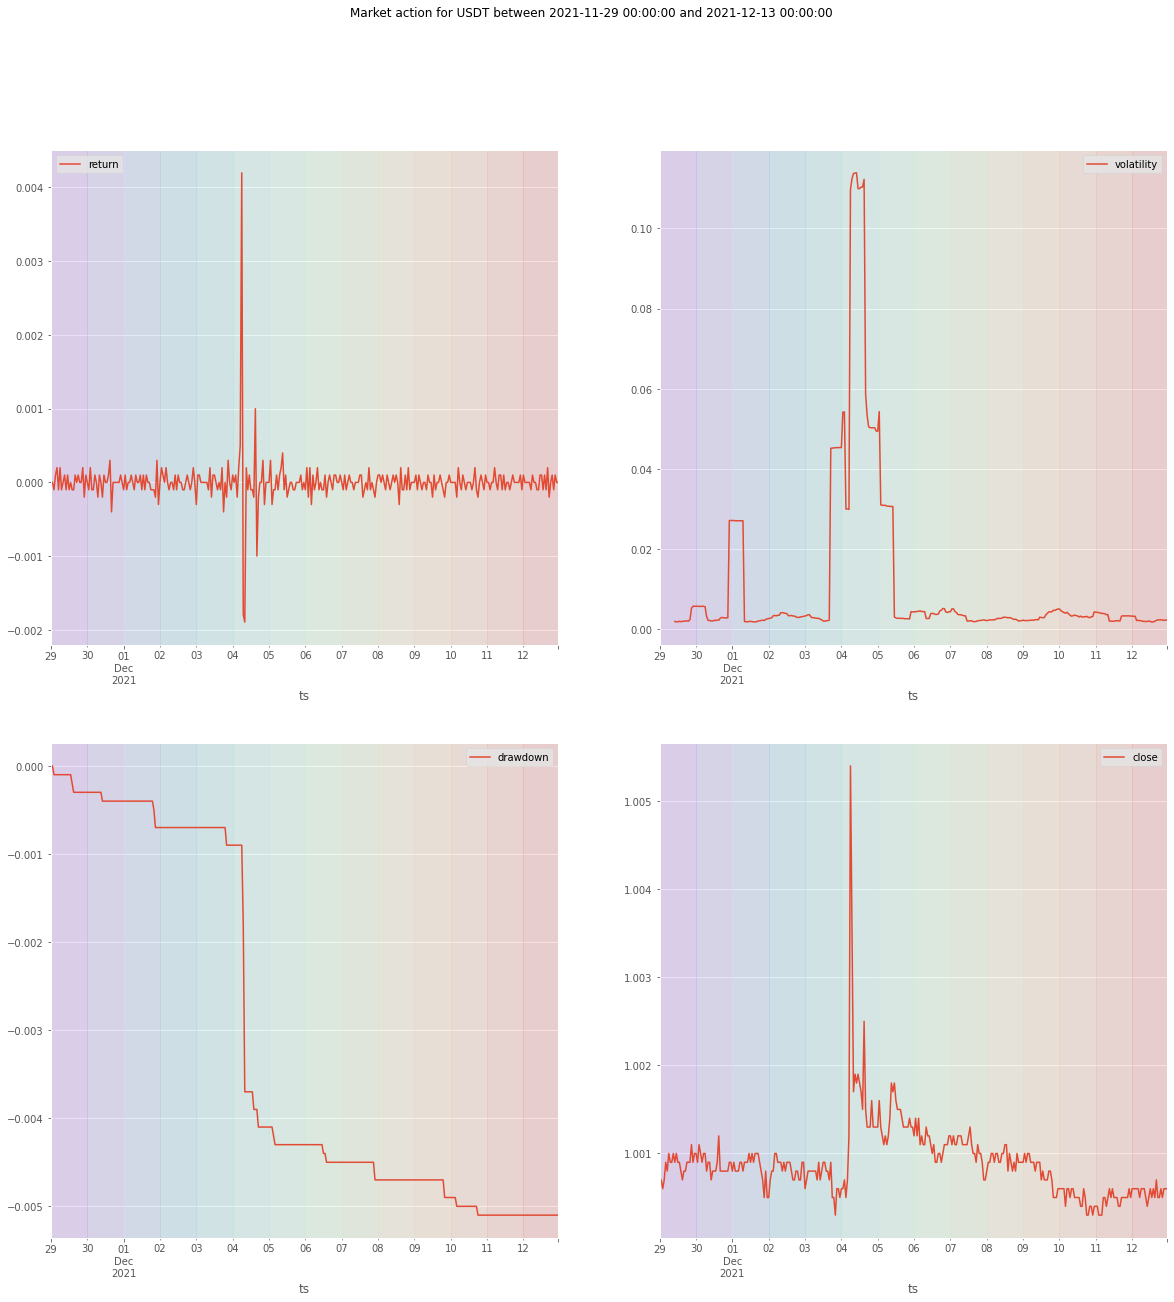

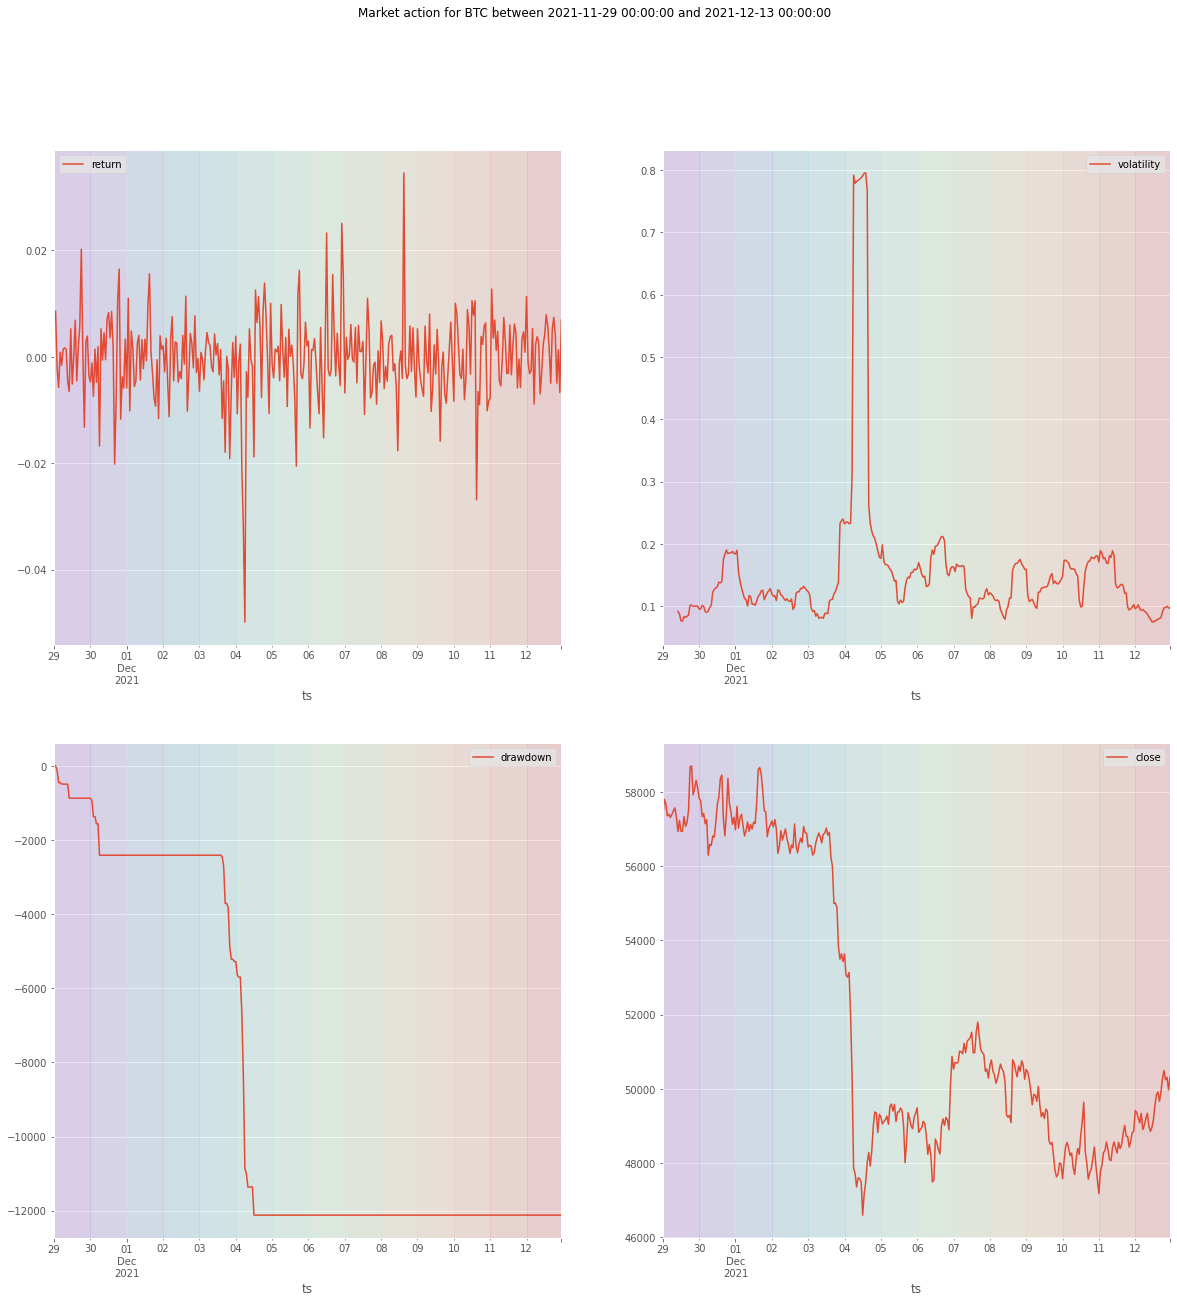

[None, None, None, None, None, None, None, None, None, None, None]

In [130]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]